# Analysis - Pyber Rideshare

In [139]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df=pd.read_csv(city_data_to_load)
ridedata_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cityride_df=pd.merge(ridedata_df, citydata_df, how='left', on="city")

# Display the data table for preview
cityride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [140]:
city_types=cityride_df['type'].unique()
city_types_df=pd.DataFrame(city_types)

In [141]:
#Avg Fare per city type
avg_fare_city=cityride_df.groupby(['type']).mean()['fare']

#total rides per city type 
total_ride=cityride_df.groupby(['type']).count()['ride_id']

#total_driver per city type
total_drivers=cityride_df.groupby(['type']).sum()['driver_count']

# City Type (Urban, Suburban, Rural)
city_type=cityride_df.groupby(['type','city']).count()

In [142]:
rural_city=cityride_df[cityride_df['type']=="Rural"]

sub_city=cityride_df[cityride_df['type']=="Suburban"]

urban_city=cityride_df[cityride_df['type']=="Urban"]

urban_city=urban_city.sort_values(["city"],ascending=True)

In [143]:
#Avg fare per city
avg_rural_fare=rural_city.groupby(["city"]).mean()['fare']

avg_sub_fare=sub_city.groupby(["city"]).mean()['fare']

avg_urb_fare=urban_city.groupby(["city"]).mean()['fare']
avg_urb_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [144]:
#Total ride per city
rural_ride=rural_city.groupby(["city"]).count()['ride_id']

sub_ride=sub_city.groupby(["city"]).count()['ride_id']

urban_ride=urban_city.groupby(["city"]).count()['ride_id']
urban_ride.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [145]:
#total driver count per city
rural_driver_count=citydata_df[citydata_df["type"]=="Rural"]

sub_driver_count=citydata_df[citydata_df["type"]=="Suburban"]

urban_driver_count=citydata_df[citydata_df["type"]=="Urban"]
urban_driver_count.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [146]:
ruraldriver_avg=rural_city.groupby(["city"]).mean()["driver_count"]
urbdriver_avg= urban_city.groupby(["city"]).mean()["driver_count"]
subdriver_avg=sub_city.groupby(["city"]).mean()["driver_count"]

## Bubble Plot of Ride Sharing Data

In [147]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

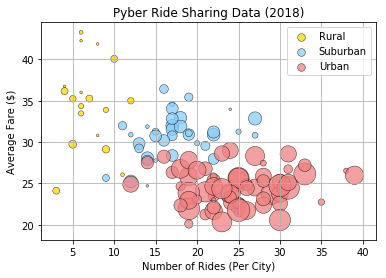

In [148]:
Rural=plt.scatter(rural_ride, avg_rural_fare, c="gold",s=7*ruraldriver_avg, edgecolor="black", 
                  linewidths=.5, alpha=.75, label="Rural")

Suburban=plt.scatter(sub_ride, avg_sub_fare, c="lightskyblue", s=7*subdriver_avg, edgecolor="black", 
                     linewidths=.5, alpha=.75, label="Suburban")

Urban=plt.scatter(urban_ride, avg_urb_fare, c="lightcoral", s=7*urbdriver_avg, edgecolor="black", 
                  linewidths=.5, alpha=.75, label="Urban")

# Add Axis and Title
plt.xlabel("Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Additional Plot Details
plt.grid()
lgnd= plt.legend()
lgnd.legendHandles[0]._sizes=[60]
lgnd.legendHandles[1]._sizes=[60]
lgnd.legendHandles[2]._sizes=[60]

plt.show()

## Total Fares by City Type

In [149]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

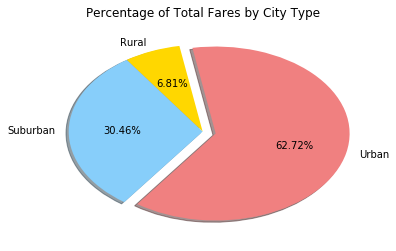

In [150]:
# Calculate Total Fare Percent Per CityType
farepercentage= 100 * cityride_df.groupby(["type"]).sum()["fare"]/cityride_df['fare'].sum()

# Build Pie Chart
plt.pie(farepercentage,
       labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue","lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.2f%%', shadow=True, startangle=100)

plt.title("Percentage of Total Fares by City Type")

#Save Figure
plt.savefig('Images/%Fares.png')

# Show Figure
plt.show()

## Total Rides by City Type

In [151]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

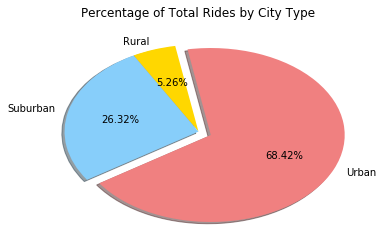

In [152]:
# Calculate Ride Percents
ride_percents = 100 * cityride_df.groupby(["type"]).count()["ride_id"] / cityride_df["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percents,
       labels=["Rural","Suburban","Urban"], colors=["gold", "lightskyblue","lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.2f%%', shadow=True, startangle=100)

plt.title("Percentage of Total Rides by City Type")

#Save Figure
plt.savefig('Images/%Rides.png')

# Show Figure
plt.show()

## Total Drivers by City Type

In [153]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

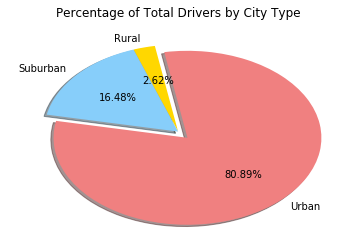

In [154]:
# Calculate Driver Percents
driver_percents = 100 * citydata_df.groupby(["type"]).sum()["driver_count"] / citydata_df["driver_count"].sum()

#Build Pie Charts
plt.pie(driver_percents,
       labels=["Rural","Suburban","Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0, 0, 0.1],
       autopct='%1.2f%%', shadow=True, startangle=100)

plt.title("Percentage of Total Drivers by City Type")

#Save Figure
plt.savefig('Images/%Drivers.png')

# Show Figure
plt.show()